In [260]:
import numpy as np
import os
from solver_funcs import F_operator, mu_from_params
import matplotlib.pyplot as plt
from utils import noise_addition_image

from posterior_funcs import Posterior, MuVector, Prior

## CHECKING CHAIN

In [261]:
sigma_percentage = 0.5
directory = f"results_{int(sigma_percentage*100)}percentnoise_1"
sigma = np.load(f"{directory}/sigma.npy")

In [262]:
true_mu = np.load(directory + '/mu_vect.npy')
# true_mu_vect = MuVector()
# true_mu_vect.update_vector(true_mu)
# true_mu = true_mu_vect.get_vector_4dim()
chain = np.load(directory + '/chain_1.npy')
# chain_2 = np.load(directory + '/chain_2.npy')

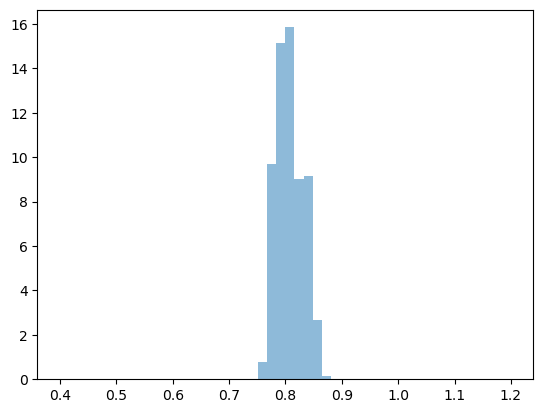

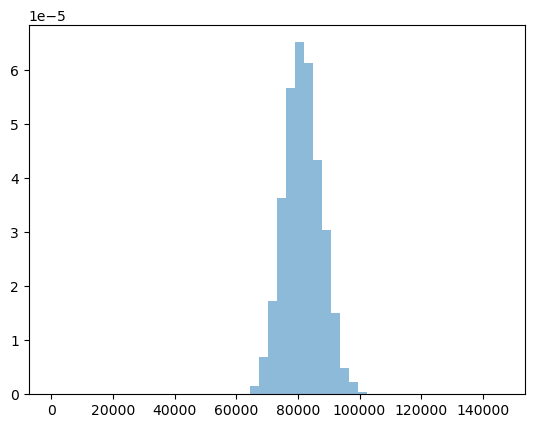

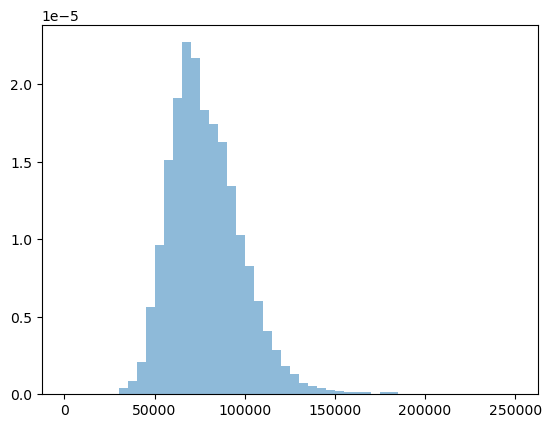

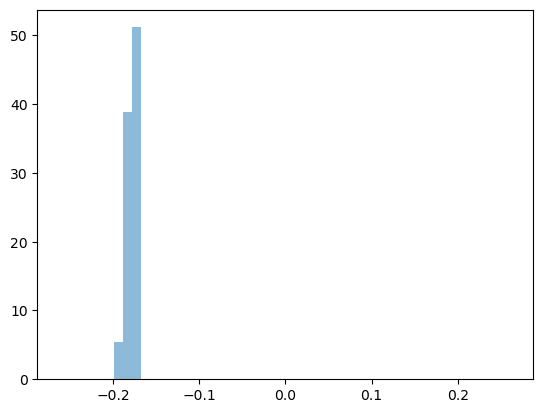

In [267]:
plt.hist(chain[1000:,0], alpha=0.5, bins=int(25/sigma_percentage), range=(0.4,1.2), density=True)
# plt.hist(chain_2[1000:,0], alpha=0.5, bins=20, range=(0.4,1.2), density=True)
plt.show()

plt.hist(chain[1000:,1], alpha=0.5, bins=int(25/sigma_percentage), range=(0, 146200), density=True)
# plt.hist(chain_2[1000:,1], alpha=0.5, bins=20, range=(0, 146200), density=True)
plt.show()

plt.hist(chain[1000:,2], alpha=0.5, bins=int(25/sigma_percentage), range=(0, 250000), density=True)
# plt.hist(chain_2[1000:,2], alpha=0.5, bins=20, range=(0, 250000), density=True)
plt.show()

plt.hist(chain[1000:,3], alpha=0.5, bins=int(25/sigma_percentage), range=(-np.pi / 12, np.pi / 12), density=True)
# plt.hist(chain_2[1000:,3], alpha=0.5, bins=20, range=(-np.pi / 12, np.pi / 12), density=True)
plt.show()

In [264]:
print(np.mean(chain[1000:,:], axis=0))
print(np.mean(chain_2[1000:,:], axis=0))
print(np.std(chain[1000:,:], axis=0))
print(np.std(chain_2[1000:,:], axis=0))

[ 8.08098218e-01  8.14629728e+04  7.84496839e+04 -1.78965083e-01]
[ 8.21650145e-01  9.30626402e+04  9.90626502e+04 -1.84633988e-01]
[2.24640390e-02 5.91525922e+03 1.99256208e+04 5.72876812e-03]
[7.79927645e-02 1.19770085e+04 3.63877272e+04 1.68386657e-02]


In [265]:
# for j in range(4):
#     print(j)
#     difference = []
#     for i in range(1, 39000, 1000):
#         difference.append(np.abs(np.std(chain[1000:1000+i,j], axis=0)- np.std(chain_2[1000:1000+i,j], axis=0)))
#     plt.plot(difference)
#     plt.show()

#     difference = []
#     for i in range(1, 39000, 1000):
#         difference.append(np.abs(np.mean(chain[1000:1000+i,j], axis=0)- np.mean(chain_2[1000:1000+i,j], axis=0)))
#     plt.plot(difference)
#     plt.show()

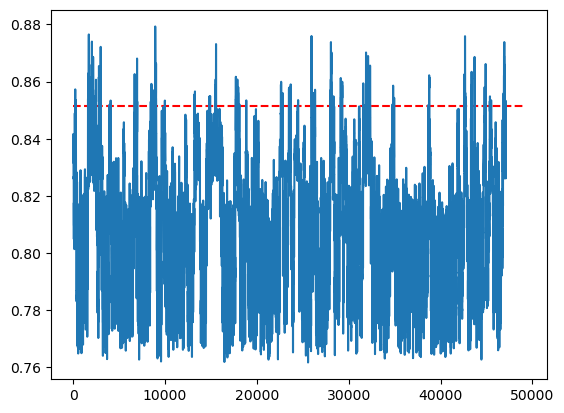

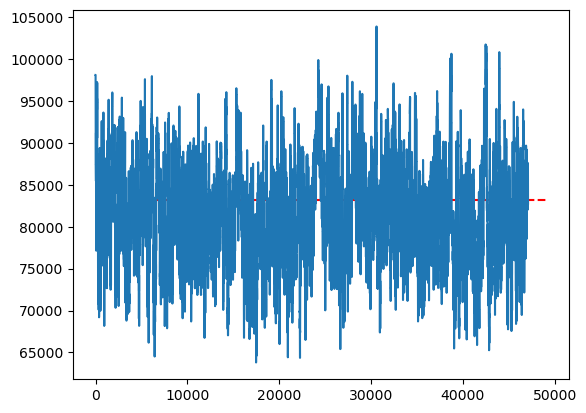

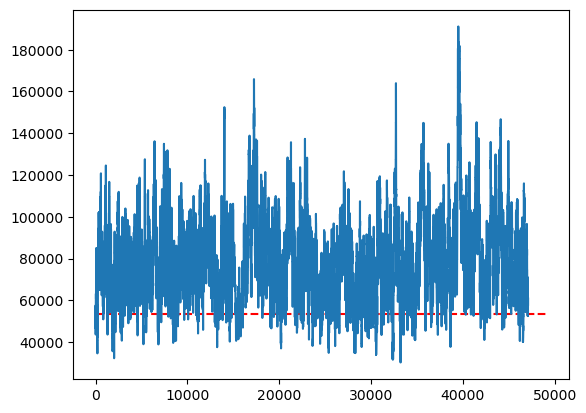

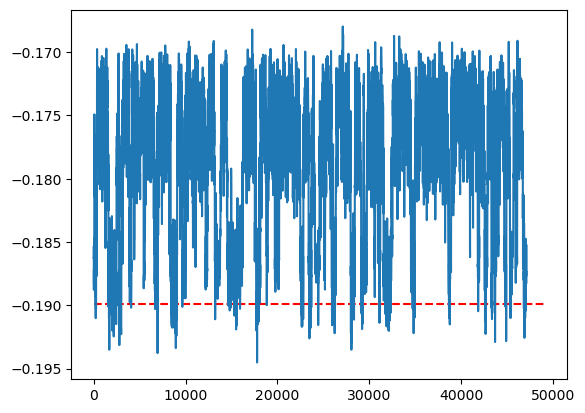

In [266]:
plt.plot([0,chain.shape[0]],[true_mu[0],true_mu[0]],'r--')
plt.plot(chain[2000:,0])
# plt.plot(chain_2[:,0])
plt.show()
plt.plot([0,chain.shape[0]],[true_mu[26],true_mu[26]],'r--')
plt.plot(chain[2000:,1])
# plt.plot(chain_2[:,1])
plt.show()
plt.plot([0,chain.shape[0]],[true_mu[27],true_mu[27]],'r--')
plt.plot(chain[2000:,2])
# plt.plot(chain_2[:,2])
plt.show()
plt.plot([0,chain.shape[0]],[true_mu[32],true_mu[32]],'r--')
plt.plot(chain[2000:,3])
# plt.plot(chain_2[:,3])
plt.show()

## CHECKING POSTERIOR

In [117]:
from solver_funcs import get_y

In [ ]:
def get_y(mu_vect):
    mu, y = F_operator(mu_vect.vector)
    mask = mu != 100
    mask = mask.astype(int)
    mask = np.repeat(mask, 2, axis=3)
    y = np.multiply(y, mask)
    return mu, y

posterior = Posterior(sigma)
mu_vect = np.load(f"{directory}/mu_vect.npy")
mu_vector = np.array([mu_vect[0], mu_vect[26], mu_vect[27], mu_vect[32]])
meas_y = np.load(f"{directory}/meas_y.npy")
mu_vect_ = MuVector()
mu_vect_.vector = mu_vect
new_y = get_y(mu_vect_)[1]



/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:144: RuntimeWarning: divide by zero encountered in scalar divide
  (self.LC_y_3 - self.LC_y_2) / (self.LC_x_3 - self.LC_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:171: RuntimeWarning: divide by zero encountered in scalar divide
  (self.LC_y_4 - self.LC_y_1) / (self.LC_x_4 - self.LC_x_1),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:220: RuntimeWarning: divide by zero encountered in scalar divide
  (self.SCTL_y_3 - self.SCTL_y_2) / (self.SCTL_x_3 - self.SCTL_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:486: RuntimeWarning: divide by zero encountered in scalar divide
  (self.ULC_y_3 - self.ULC_y_2) / (self.ULC_x_3 - self.ULC_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 7.338e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.734e-17 (tol = 1.000e-10) r (rel) = 5.089e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


In [12]:
posterior.logpostprob(mu_vector, new_y, meas_y)

-4124.345636571193

In [13]:
mu_vect_.update_vector(chain[1000])    
mu_vector = mu_vect_.get_vector_4dim()
new_y = get_y(mu_vect_)[1]
posterior.logpostprob(mu_vector, new_y, meas_y)


/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:144: RuntimeWarning: divide by zero encountered in scalar divide
  (self.LC_y_3 - self.LC_y_2) / (self.LC_x_3 - self.LC_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:171: RuntimeWarning: divide by zero encountered in scalar divide
  (self.LC_y_4 - self.LC_y_1) / (self.LC_x_4 - self.LC_x_1),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:220: RuntimeWarning: divide by zero encountered in scalar divide
  (self.SCTL_y_3 - self.SCTL_y_2) / (self.SCTL_x_3 - self.SCTL_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/ONHFenics_SamplingPosterior/mu_funcs_given.py:486: RuntimeWarning: divide by zero encountered in scalar divide
  (self.ULC_y_3 - self.ULC_y_2) / (self.ULC_x_3 - self.ULC_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/CWGAN_InverseElast/

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 8.329e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.099e-17 (tol = 1.000e-10) r (rel) = 4.921e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


-4122.963519580393

## CHECKING CHAIN METRICS

In [4]:
import arviz as az

In [24]:
ess = az.ess(chain[1000:,3])

In [25]:
ess

7.4122730021236105

In [11]:
def autocorrelation(chain, lag):
    """
    Calculate autocorrelation of the chain at a specific lag.
    """
    n = len(chain)
    mean = np.mean(chain)
    var = np.var(chain)
    autocov = np.sum((chain[:n-lag] - mean) * (chain[lag:] - mean)) / n
    return autocov / var

def effective_sample_size(chain):
    """
    Calculate the Effective Sample Size (ESS) of an MCMC chain for 1D array.
    """
    n = len(chain)
    tau = 1  # Start with lag 0 (autocorrelation = 1)
    for lag in range(1, n):
        acorr = autocorrelation(chain, lag)
        if acorr <= 0:  # Stop summing when autocorrelation is negligible or negative
            break
        tau += 2 * acorr
    return n / tau

# Calculate ESS for each dimension
ess_per_dim = [effective_sample_size(chain[:, dim]) for dim in range(chain.shape[1])]

print(f"Effective Sample Sizes for each dimension: {ess_per_dim}")


Effective Sample Sizes for each dimension: [10.178181554083391, 27.004475605588674, 18.35048029005646, 11.956432335261331]


In [ ]:
import arviz as az
import numpy as np

# Example: 4 chains, 1000 iterations, 3 parameters, 2 features
chains = np.random.normal(0, 1, (4, 1000, 3, 2))

# Reshape: Treat each parameter-feature combination as separate
reshaped_chains = chains.reshape(4, 1000, -1)

# Calculate R-hat
r_hat = az.rhat(reshaped_chains)
print(f"R-hat: {r_hat}")

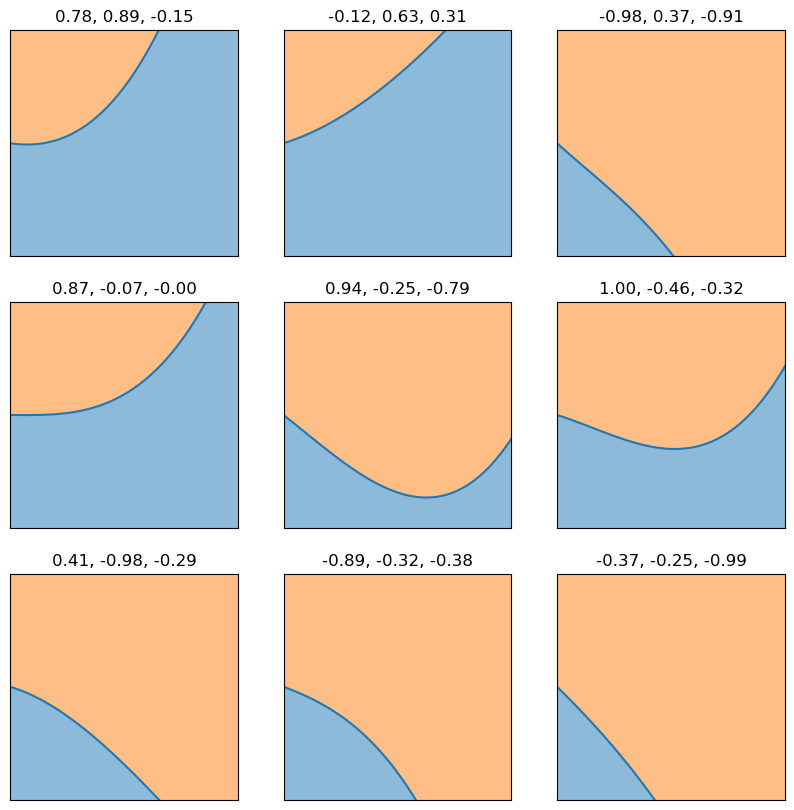

In [234]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(9):

    x = np.linspace(0, 1, 100)
    factor = 1
    a = np.random.uniform(-1,1) * factor
    b = np.random.uniform(-1,1) * factor
    c = np.random.uniform(-1,1) * factor

    y = a*x**3 + b*x**2 + c*x + 0.5

    ax[i//3, i%3].plot(x, y)
    ax[i//3, i%3].set_ylim(0,1)
    ax[i//3, i%3].set_xlim(0,1)

    ax[i//3, i%3].fill_between(x, y, 0, alpha=0.5)
    #fill above
    ax[i//3, i%3].fill_between(x, y, 1, alpha=0.5)
    ax[i//3, i%3].set_xticks([])
    ax[i//3, i%3].set_yticks([])

    ax[i//3, i%3].set_title(f"{a:.2f}, {b:.2f}, {c:.2f}")

fig.subplots_adjust
plt.show()

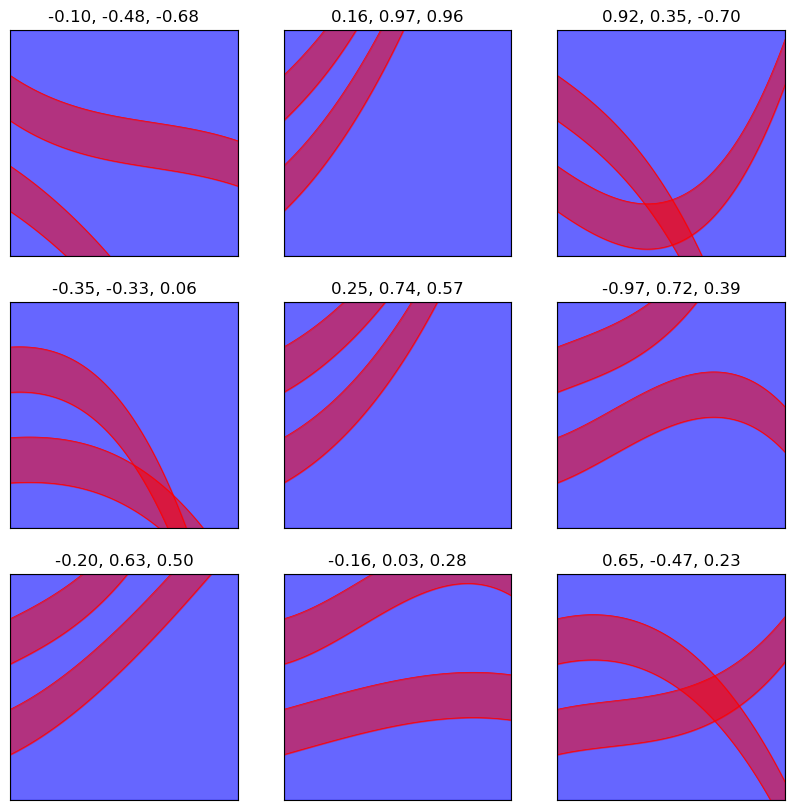

In [280]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(9):

    x = np.linspace(0, 1, 100)
    factor = 1
    a1 = np.random.uniform(-1,1) * factor
    b1 = np.random.uniform(-1,1) * factor
    c1 = np.random.uniform(-1,1) * factor

    a2 = np.random.uniform(-1,1) * factor
    b2 = np.random.uniform(-1,1) * factor
    c2 = np.random.uniform(-1,1) * factor

    ax[i//3, i%3].fill_between(x, 0, 1, alpha=0.6, color='b')

    y1 = a1*x**3 + b1*x**2 + c1*x + 0.2
    y2 = a1*x**3 + b1*x**2 + c1*x + 0.4

    ax[i//3, i%3].plot(x, y1, 'r', linewidth=0.5)   
    ax[i//3, i%3].plot(x, y2, 'r', linewidth=0.5)
    ax[i//3, i%3].set_ylim(0,1)
    ax[i//3, i%3].set_xlim(0,1)

    ax[i//3, i%3].fill_between(x, y1, y2, alpha=0.5, color='r')

    y3 = a2*x**3 + b2*x**2 + c1*x + 0.6
    y4 = a2*x**3 + b2*x**2 + c1*x + 0.8

    ax[i//3, i%3].plot(x, y3, 'r', linewidth=0.5)
    ax[i//3, i%3].plot(x, y4, 'r', linewidth=0.5)
    ax[i//3, i%3].set_ylim(0,1)
    ax[i//3, i%3].set_xlim(0,1)

    ax[i//3, i%3].fill_between(x, y3, y4, alpha=0.5, color='r')
    #fill above
    # ax[i//3, i%3].fill_between(x, y2, 1, alpha=0.6, color='b')
    # ax[i//3, i%3].fill_between(x, 0, y1, alpha=0.6, color='b')
    ax[i//3, i%3].set_xticks([])
    ax[i//3, i%3].set_yticks([])

    ax[i//3, i%3].set_title(f"{a1:.2f}, {b1:.2f}, {c1:.2f}")

fig.subplots_adjust
plt.show()

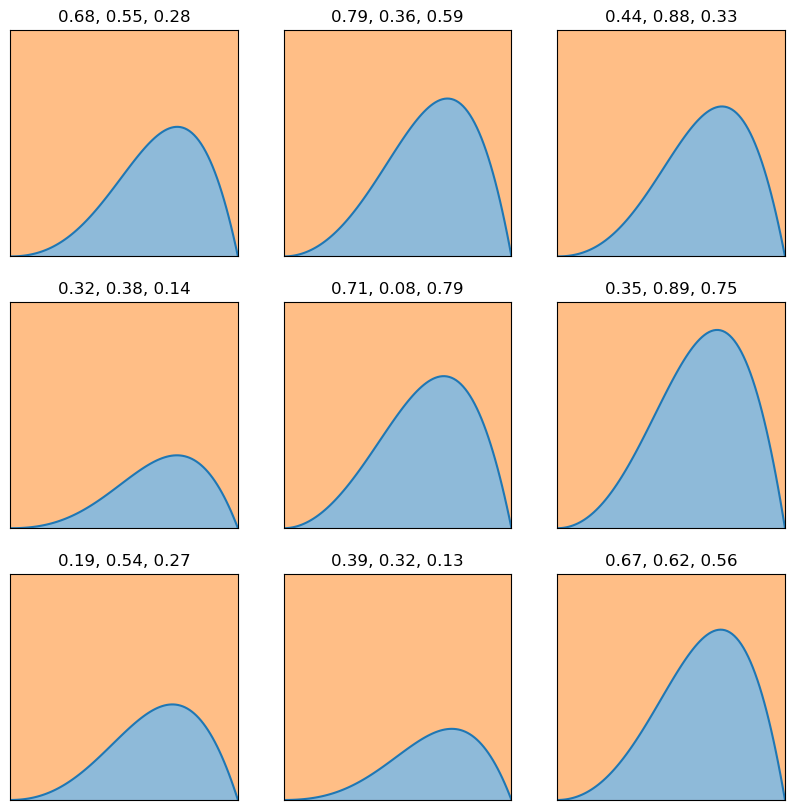

In [272]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(9):

    x = np.linspace(0, 1, 100)
    factor = 1
    a = np.random.uniform(0.,1) * factor
    b = np.random.uniform(0.,1) * factor
    c = np.random.uniform(0.,1) * factor

    y = np.sin(x*np.pi) * (a*x**3 + b*x**2 + c*x)

    ax[i//3, i%3].plot(x, y)
    ax[i//3, i%3].set_ylim(0,1)
    ax[i//3, i%3].set_xlim(0,1)

    ax[i//3, i%3].fill_between(x, y, 0, alpha=0.5)
    #fill above
    ax[i//3, i%3].fill_between(x, y, 1, alpha=0.5)
    ax[i//3, i%3].set_xticks([])
    ax[i//3, i%3].set_yticks([])

    ax[i//3, i%3].set_title(f"{a:.2f}, {b:.2f}, {c:.2f}")

fig.subplots_adjust
plt.show()